In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('db.csv')


In [13]:
#s = setup(df, target = 'attack_cat', session_id = 123)

In [8]:
"""from pandas_profiling import ProfileReport
prof = ProfileReport(df)
#prof.to_file(output_file='output.html')
prof"""

"from pandas_profiling import ProfileReport\nprof = ProfileReport(df)\n#prof.to_file(output_file='output.html')\nprof"

In [ ]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [7]:
df = df.drop(['attack_cat', 'Unnamed:0'], axis=1)


KeyError: "['Unnamed:0'] not found in axis"

In [9]:
df

,Unnamed: 0,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0,0.000011,udp,-,INT,2,0,496,0,90909.090000,...,0,0,1,1,0,0,0,0,Normal,0
1,1,0.000008,udp,-,INT,2,0,1762,0,125000.000000,...,0,0,1,1,0,0,0,0,Normal,0
2,2,0.000005,udp,-,INT,2,0,1068,0,200000.000000,...,0,0,1,1,0,0,0,0,Normal,0
3,3,0.000006,udp,-,INT,2,0,900,0,166666.660000,...,0,0,2,1,0,0,0,0,Normal,0
4,4,0.000010,udp,-,INT,2,0,2126,0,100000.000000,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82327,0.000005,udp,-,INT,2,0,104,0,200000.000000,...,0,0,1,1,0,0,0,0,Normal,0
82328,82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,0,0,1,1,0,0,0,0,Normal,0
82329,82329,0.000000,arp,-,INT,1,0,46,0,0.000000,...,0,0,1,1,0,0,0,1,Normal,0
82330,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,0,0,1,1,0,0,0,1,Normal,0


In [10]:
df.dtypes

Unnamed: 0             int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
is_ftp_login           int64
ct_ftp_cmd             int64
ct_flw_http_mthd       int64
is_sm_ips_port

In [11]:
"""ct_dst_sport_ltm: Count of destination IP and source port unique connections observed in the past. It represents the number of unique connections observed between a specific destination IP and source port combination.

dload: Destination load in bytes per second. It indicates the load or amount of data being received at the destination in terms of bytes per second.

spkts: Source packets sent. It denotes the number of packets sent from the source.

sbytes: Source bytes sent. It represents the total number of bytes sent from the source.

dloss: Destination packet loss. It indicates the number of packets lost or dropped at the destination.

dbytes: Destination bytes sent. It represents the total number of bytes sent to the destination.

smean: Mean of the source packet size. It denotes the average packet size sent from the source.

sload: Source load in bytes per second. It indicates the load or amount of data being sent from the source in terms of bytes per second.

dmean: Mean of the destination packet size. It denotes the average packet size received at the destination.

rate: Rate of data transfer in bytes per second. It represents the rate at which data is transferred between the source and destination in terms of bytes per second.

"""

'ct_dst_sport_ltm: Count of destination IP and source port unique connections observed in the past.\ndload: Destination load in bytes per second.\nspkts: Source packets sent.\nsbytes: Source bytes sent.\ndloss: Destination packet loss.\ndbytes: Destination bytes sent.\nsmean: Mean of the source packet size.\nsload: Source load in bytes per second.\ndmean: Mean of the destination packet size.\nrate: Rate of data transfer in bytes per second.'

In [15]:
dff=df[['ct_dst_sport_ltm','dload','spkts','sbytes','dloss','dbytes','smean','sload','dmean','rate','label']]

In [17]:
dff

,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate,label
0,1,0.0000,2,496,0,0,248,180363630.0,0,90909.090000,0
1,1,0.0000,2,1762,0,0,881,881000000.0,0,125000.000000,0
2,1,0.0000,2,1068,0,0,534,854400000.0,0,200000.000000,0
3,1,0.0000,2,900,0,0,450,600000000.0,0,166666.660000,0
4,1,0.0000,2,2126,0,0,1063,850400000.0,0,100000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
82327,1,0.0000,2,104,0,0,52,83200000.0,0,200000.000000,0
82328,1,2242.1099,20,18062,1,354,903,124104.4,44,24.410067,0
82329,1,0.0000,1,46,0,0,46,0.0,0,0.000000,0
82330,1,0.0000,1,46,0,0,46,0.0,0,0.000000,0


In [20]:
s = setup(dff, target='label', fix_imbalance=True )

,Description,Value
0,Session id,3177
1,Target,label
2,Target type,Binary
3,Original data shape,"(82332, 11)"
4,Transformed data shape,"(88164, 11)"
5,Transformed train set shape,"(63464, 11)"
6,Transformed test set shape,"(24700, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [21]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

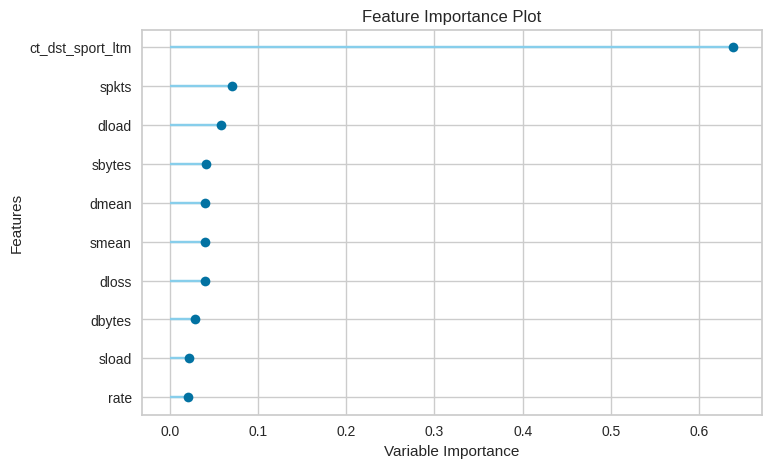

In [22]:

# functional API
plot_model(best, plot = 'feature')

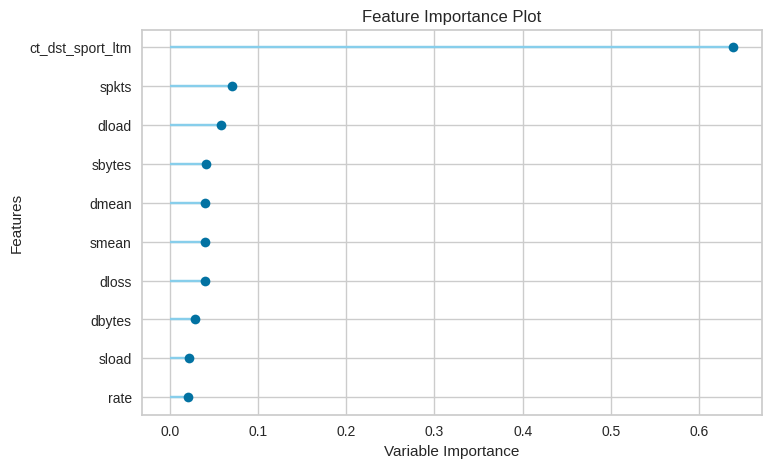

In [23]:

# functional API
plot_model(best, plot = 'feature_all')

In [24]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9365,0.9869,0.9193,0.9637,0.9410,0.8723,0.8734


,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate,label,prediction_label,prediction_score
40895,1,1.383823e+04,10,806,2,1106,81,1.037867e+04,138,30.378353,0,0,0.9330
47793,1,0.000000e+00,2,1064,0,0,532,2.128000e+09,0,500000.000000,1,0,0.7750
59079,4,0.000000e+00,2,114,0,0,57,4.145454e+07,0,90909.093750,1,1,1.0000
61647,1,5.744566e+03,10,968,1,268,97,2.236277e+04,45,48.085094,1,1,0.9209
36966,1,1.264982e+07,78,4550,33,71834,58,8.010343e+05,898,3499.621094,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,1,5.877477e+04,28,5080,7,3080,181,9.668824e+04,103,140.621292,0,0,0.9998
41508,1,1.268153e+02,6,998,1,86,166,2.453728e+03,43,2.580543,0,0,0.9967
31435,1,3.020833e+06,18,3672,7,2456,204,4.515625e+06,136,5696.614258,0,0,0.9991
35798,1,6.056075e+05,2,130,0,162,65,4.859813e+05,81,2803.738281,0,0,0.9999


In [25]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ct_dst_sport_ltm', 'dload',
                                              'spkts', 'sbytes', 'dloss',
                                              'dbytes', 'smean', 'sload',
                                              'dmean', 'rate'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imput...
                                gamma=0, gpu_id=-1, gr

In [26]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9370,0.9868,0.9182,0.9658,0.9414,0.8735,0.8748,0.0330
catboost,CatBoost Classifier,0.9359,0.9866,0.9168,0.9651,0.9403,0.8713,0.8726,0.0320
lightgbm,Light Gradient Boosting Machine,0.9328,0.9855,0.9051,0.9710,0.9369,0.8653,0.8678,0.0390
rf,Random Forest Classifier,0.9325,0.9836,0.9281,0.9481,0.9380,0.8638,0.8641,0.0770
et,Extra Trees Classifier,0.9311,0.9788,0.9285,0.9454,0.9369,0.8610,0.8612,0.0990
dt,Decision Tree Classifier,0.9227,0.9254,0.9245,0.9345,0.9295,0.8441,0.8441,0.0290
gbc,Gradient Boosting Classifier,0.9078,0.9755,0.8640,0.9648,0.9116,0.8158,0.8213,0.0390
knn,K Neighbors Classifier,0.9012,0.9574,0.8843,0.9328,0.9079,0.8016,0.8029,0.0810
ada,Ada Boost Classifier,0.8611,0.9517,0.7995,0.9393,0.8636,0.7239,0.7339,0.0410
qda,Quadratic Discriminant Analysis,0.7600,0.8724,0.6239,0.9128,0.7411,0.5317,0.5655,0.0350


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ct_dst_sport_ltm', 'dload',
                                              'spkts', 'sbytes', 'dloss',
                                              'dbytes', 'smean', 'sload',
                                              'dmean', 'rate'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imput...
                                gamma=0, gpu_id=-1, gr